In [1]:
# This is a set of scripts to explore a MVPA analysis with Smith and Wang
# Python 2
# First thing is importing the libraries
import nilearn
from nilearn import datasets,image,masking,signal,plotting,input_data
import numpy as np
import pandas as pd
import sklearn as skl
import os
import matplotlib.pyplot as plt
os.chdir('../')


/usr/local/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Python2 support is deprecated and will be removed in a future release. Consider switching to Python3.
  after removing the cwd from sys.path.
/usr/local/anaconda2/lib/python2.7/site-packages/sklearn/utils/graph.py:15: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .graph_shortest_path import graph_shortest_path  # noqa
/usr/local/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/base.py:35: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ..utils.seq_dataset impo

In [2]:
#Second thing is getting the data
# Gonna download 2 sets of masks that we may use
sub_cort_HO=datasets.fetch_atlas_harvard_oxford(
    'sub-prob-2mm')
pauli=datasets.fetch_atlas_pauli_2017()
#List of z_images
func_list=[]
label_list=[]
#List of labels
sublist=os.listdir('data')
for sub in sublist:
    print sub
    func_list.append('data/%s/%s_func.nii.gz'%(sub,sub))
    label_list.append(
        pd.read_csv('data/%s/%s_labels.csv'%(sub,sub)
                   ,sep='\t'))
for df in label_list:
    df['high_low']=df.apply(lambda row: np.greater(row[3],2.5),axis=1 )

sub-119
sub-118
sub-107
sub-113
sub-106
sub-112
sub-125
sub-123
sub-108
sub-111
sub-115
sub-117
sub-120
sub-116
sub-114
sub-109
sub-121
sub-122
sub-104
sub-110


Here we verify that everything is looking normal for one subject
sub-119
data/sub-119/sub-119_func.nii.gz


,Unnamed: 0,0,1,2,3,type,run,high_low
0,0,1.0,1.0,3.0,0.0,a,1,True
1,1,2.0,1.0,1.0,0.0,a,1,False
2,2,3.0,1.0,2.0,0.0,a,1,False
3,3,4.0,1.0,2.0,0.0,a,1,False
4,4,5.0,1.0,2.0,0.0,a,1,False


 The areas in the pauli 2017 atlas are ['Pu', 'Ca', 'NAC', 'EXA', 'GPe', 'GPi', 'SNc', 'RN', 'SNr', 'PBP', 'VTA', 'VeP', 'HN', 'HTH', 'MN', 'STH']


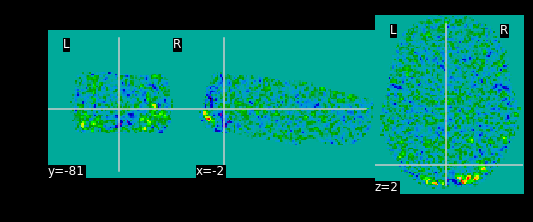

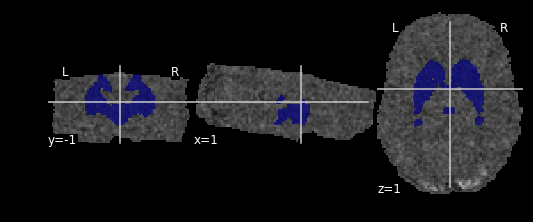

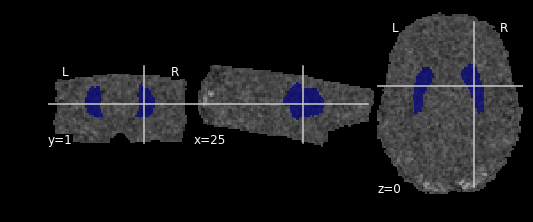

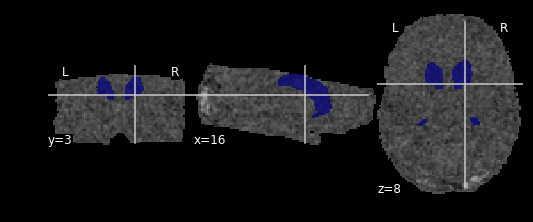

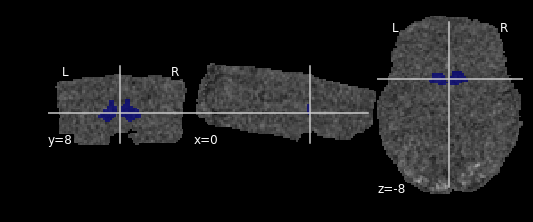

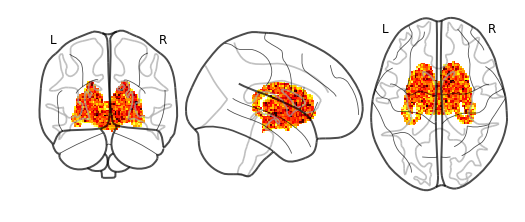

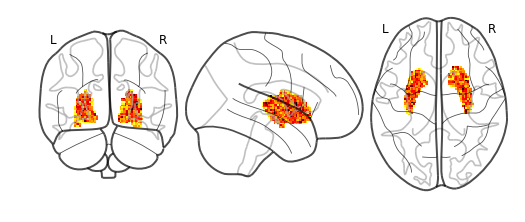

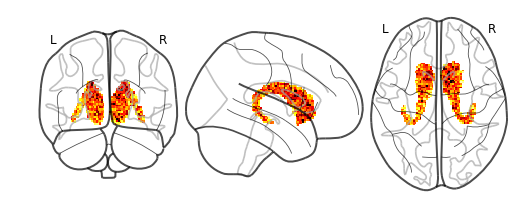

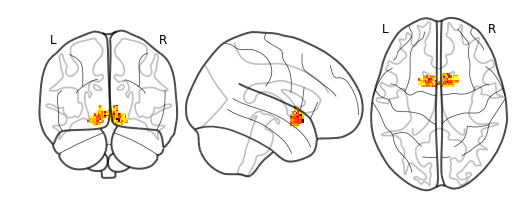

In [3]:
#Let's check out our data and masks
#the behavioral is hopefully easiest to verify
print("Here we verify that everything is looking normal for one subject")
print(sublist[0])
#we can check manually if we want that
#this is correct. It is
print(func_list[0])
display(label_list[0].head())
print(" The areas in the pauli 2017 atlas are %s"%(pauli.labels))
func=image.load_img(func_list[0])
mean_img=image.image.mean_img(func)
plotting.plot_epi(mean_img)
small_mask=masking.compute_background_mask(
    image.resample_to_img(pauli.maps,mean_img,interpolation='linear'))

res_put=masking.compute_background_mask(
    image.resample_to_img(image.index_img(pauli.maps,0),mean_img,interpolation='linear'))

res_caud=masking.compute_background_mask(
    image.resample_to_img(image.index_img(pauli.maps,1),mean_img,interpolation='linear'))

res_Nac=masking.compute_background_mask(
    image.resample_to_img(image.index_img(pauli.maps,2),mean_img,interpolation='linear'))

plotting.plot_roi(small_mask,mean_img)
plotting.plot_roi(res_put,mean_img)
plotting.plot_roi(res_caud,mean_img)
plotting.plot_roi(res_Nac,mean_img)

#make a few different maskers for full subcortex of interest and sub areas
full_pauli_masker=input_data.NiftiMasker(mask_img=small_mask)
Put_masker=input_data.NiftiMasker(mask_img=res_put)
                                            
Caud_masker=input_data.NiftiMasker(mask_img=res_caud)
                                   
NAc_masker=input_data.NiftiMasker(mask_img=res_Nac)


#look at all the masked images they make
masked_img=full_pauli_masker.fit_transform(func)
Put_masked_img=Put_masker.fit_transform(func)
Caud_masked_img=Caud_masker.fit_transform(func)
NAc_masked_img=NAc_masker.fit_transform(func)

plotting.plot_glass_brain(image.image.mean_img(
        full_pauli_masker.inverse_transform(masked_img)))
plotting.plot_glass_brain(image.image.mean_img(
        Put_masker.inverse_transform(Put_masked_img)))
plotting.plot_glass_brain(image.image.mean_img(
        Caud_masker.inverse_transform(Caud_masked_img)))
plotting.plot_glass_brain(image.image.mean_img(
        NAc_masker.inverse_transform(NAc_masked_img)))
plt.show()

/usr/local/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[False  True]
sub-119 was classified with accuracy 0.6308167141500475 and took 131.692740917 time to permute & pvalue =0.37453183520599254
[False  True]
sub-118 was classified with accuracy 0.6448243114909782 and took 132.717926979 time to permute & pvalue =0.132334581772784
[False  True]
sub-107 was classified with accuracy 0.7186609686609686 and took 130.508566141 time to permute & pvalue =0.009987515605493134
[False  True]
sub-113 was classified with accuracy 0.6873219373219372 and took 133.625252008 time to permute & pvalue =0.03495630461922597
[False  True]
sub-106 was classified with accuracy 0.5866571699905033 and took 133.23190093 time to permute & pvalue =0.630461922596754
[False  True]
sub-112 was classified with accuracy 0.6298670465337132 and took 132.450330973 time to permute & pvalue =0.22971285892634208
[False  True]
sub-125 was classified with accuracy 0.5296771130104463 and took 131.695127964 time to permute & pvalue =0.6479400749063671
[False  True]
sub-123 was classi

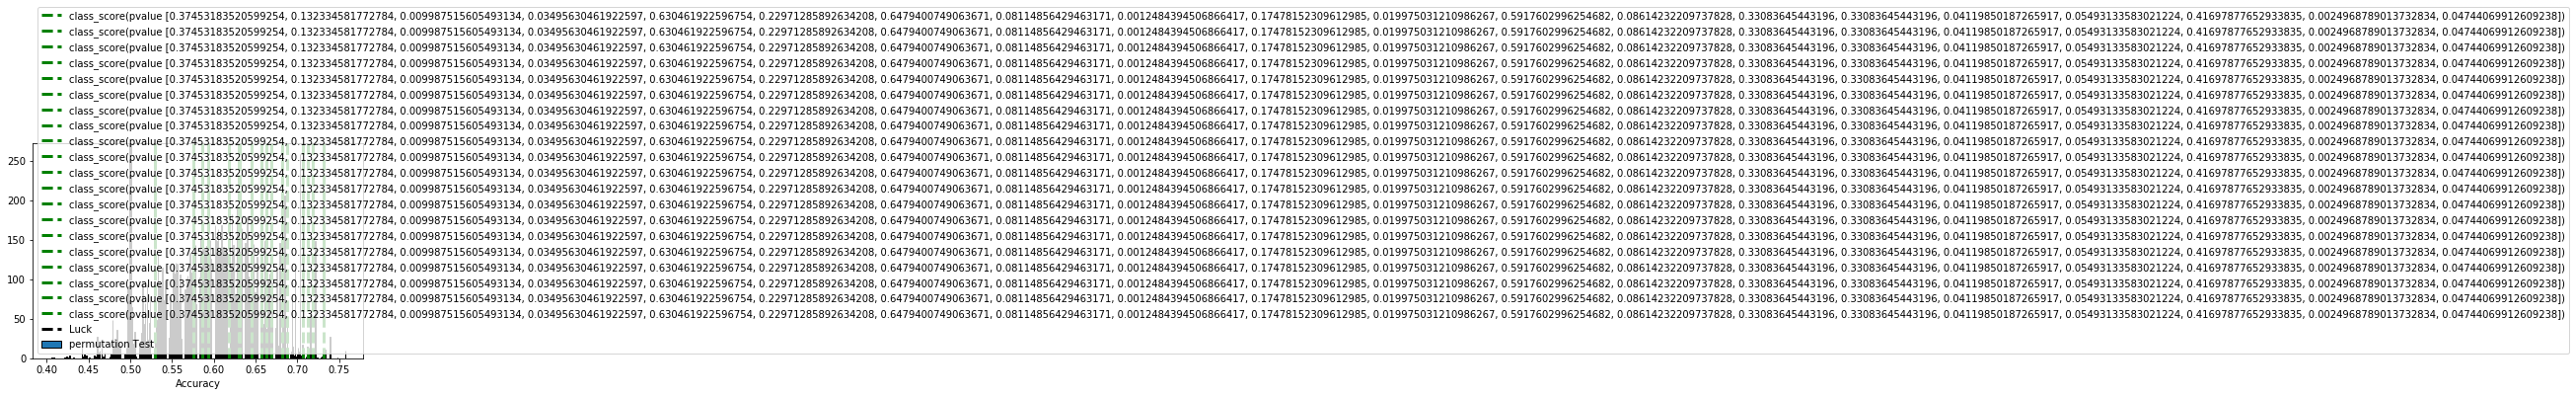

In [4]:
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import LeaveOneLabelOut, cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit,KFold,permutation_test_score
import matplotlib.pyplot as plt
import time
import random
full_scores=[]
full_perm_scores=[]
full_pvals=[]
for i,sub in enumerate(sublist):
    start=time.time()
    # Load target information as string and give a numerical identifier to each
    behavioral = label_list[i]
    conditions = behavioral['high_low']

    # We now have 2 conditions
    print(np.unique(conditions))


    # For decoding, standardizing is often very important
    # note that we are also smoothing the data
    
    func_filename = func_list[i]
    X = full_pauli_masker.fit_transform(func_filename)
    # Apply our condition_mask
    
    c=list(zip(X,conditions))
    random.shuffle(c)
    X,conditions=zip(*c)

    svc = SVC(kernel='linear',C=1)

   
    # Define the cross-validation scheme used for validation.
    # Here we use a LeaveOneLabelOut cross-validation on the session label
    # which corresponds to a leave-one-session-out
    cv = KFold(n_splits=6)

    # Print the results
    score,permutation_scores,pvalue=permutation_test_score(
        svc,X,conditions,scoring="accuracy",cv=cv,n_permutations=800, n_jobs=24)
    
    full_scores.append(score)
    full_perm_scores.append(permutation_scores)
    full_pvals.append(pvalue)
    end_time=(time.time()-start)
    print("%s was classified with accuracy %s and took %s time to permute & pvalue =%s"
          %(sub,score,end_time,pvalue))
    
print("Classification accuracy: %.4f / pvalue: %f" %(np.mean(full_scores),np.mean(full_pvals)))
# Classification accuracy: 0.8009 / Chance level: 0.5000
plt.hist(full_perm_scores,20,label="permutation Test",
        edgecolor="black")
ylim=plt.ylim()
plt.plot(2*[full_scores],ylim,'--g',linewidth=3,label='class_score'+'(pvalue %s)' % full_pvals)
plt.plot(2 * [1./np.unique(conditions).size],ylim,'--k',linewidth=3,label='Luck')
plt.ylim(ylim)
plt.legend()
plt.xlabel('Accuracy')
plt.show()
    
    
        


for i,sub in enumerate(sublist):
    start=time.time()
    # Load target information as string and give a numerical identifier to each
    behavioral = label_list[i]
    conditions = behavioral['type']

    # We now have 2 conditions
    print(np.unique(conditions))


    # For decoding, standardizing is often very important
    # note that we are also smoothing the data
    
    func_filename = func_list[i]
    X = masker.fit_transform(func_filename)
    # Apply our condition_mask
    
    c=list(zip(X,conditions))
    random.shuffle(c)
    X,conditions=zip(*c)

    svc = SVC(kernel='linear',C=1)

   
    # Define the cross-validation scheme used for validation.
    # Here we use a LeaveOneLabelOut cross-validation on the session label
    # which corresponds to a leave-one-session-out
    cv = KFold(n_splits=6)
    

    
    # Print the results
    score,permutation_scores,pvalue=permutation_test_score(
        svc,X,conditions,scoring="accuracy",cv=cv,n_permutations=300, n_jobs=24)
    
    print("Classification accuracy: %.4f / pvalue: %f" %
          (score,pvalue))
    # Classification accuracy: 0.8009 / Chance level: 0.5000
    plt.hist(permutation_scores,20,label="permutation Test",
            edgecolor="black")
    ylim=plt.ylim()
    plt.plot(2*[score],ylim,'--g',linewidth=3,label='class_score'+'(pvalue %s)' % pvalue)
    plt.plot(2 * [1./np.unique(conditions).size],ylim,'--k',linewidth=3,label='Luck')
    plt.ylim(ylim)
    plt.legend()
    plt.xlabel('Accuracy')
    plt.show()
    
    end_time=(time.time()-start)
    print("%s was classified with accuracy %s and took %s time to permute"%(sub,score,end_time))
        

79.75625


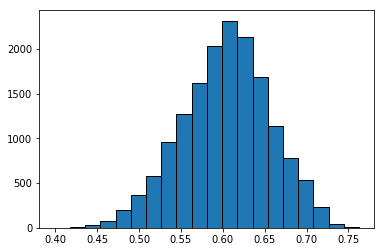

In [17]:
from scipy.stats import percentileofscore
cat_perm_scores=np.concatenate(full_perm_scores)
plt.hist(cat_perm_scores,20,label="permutation Test",
        edgecolor="black")
pval_f=percentileofscore(cat_perm_scores,np.mean(full_scores))
print(pval_f)

In [6]:
X[0].shape

(13792,)